# Sources K-Mean

- https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail
- https://www.youtube.com/watch?v=4b5d3muPQmA
- https://www.youtube.com/watch?v=HVXime0nQeI
- https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation
- 



## Tools used:
- pandas
- numpy
- KMeans from sklearn.cluster
- StandardScaler from sklearn.preprocessing
- PCA from sklearn.decomposition

## Notes to Data 

#### What do you think the opposite sex looks for in a date?
Please distribute 100 points among the following attributes -- give more points to those attributes that you think are more important to members of the opposite sex when they are deciding whether to date someone.  Total points must equal 100.


In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

data = pd.read_csv('Speed Dating Data.csv', engine='python') #otwarcie pliku CSV

data.head() #wyświetlenie całego zbioru danych 5 na 195

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# selecting the right columns
columns = ['iid', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
dataset = data.loc[:, columns].copy()

columns = ['iid', 'attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_inter' ]
dataset = dataset.set_axis(columns, axis=1, inplace=False)
dataset.head()

,iid,attractive,sincere,intelligent,fun,ambitious,shared_inter
0,1,35.0,20.0,15.0,20.0,5.0,5.0
1,1,35.0,20.0,15.0,20.0,5.0,5.0
2,1,35.0,20.0,15.0,20.0,5.0,5.0
3,1,35.0,20.0,15.0,20.0,5.0,5.0
4,1,35.0,20.0,15.0,20.0,5.0,5.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iid           8378 non-null   int64  
 1   attractive    8299 non-null   float64
 2   sincere       8299 non-null   float64
 3   intelligent   8299 non-null   float64
 4   fun           8299 non-null   float64
 5   ambitious     8289 non-null   float64
 6   shared_inter  8289 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 458.3 KB


In [5]:
dataset.shape

(8378, 7)

In [6]:
dataset.describe()

,iid,attractive,sincere,intelligent,fun,ambitious,shared_inter
count,8378.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000
mean,283.675937,30.362192,13.273691,14.416891,18.422620,11.744499,11.854817
std,158.583367,16.249937,6.976775,6.263304,6.577929,6.886532,6.167314
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,20.000000,10.000000,10.000000,15.000000,6.000000,10.000000
50%,281.000000,25.000000,15.000000,15.000000,20.000000,10.000000,10.000000
75%,407.000000,40.000000,18.750000,20.000000,20.000000,15.000000,15.630000
max,552.000000,100.000000,50.000000,40.000000,50.000000,50.000000,30.000000


In [7]:
dataset.isnull().sum()

iid              0
attractive      79
sincere         79
intelligent     79
fun             79
ambitious       89
shared_inter    89
dtype: int64

In [8]:
print('Number of duplicated rows in the dataset: ', dataset.duplicated().sum())
print('Data from the same participants: ', dataset.duplicated(subset=['iid']).sum())
print('Number of unique participant ids: ', len(dataset.iid.unique()))


Number of duplicated rows in the dataset:  7827
Data from the same participants:  7827
Number of unique participant ids:  551


In [9]:
# we know that duplicates are generated by the same participans 
# so we can drop duplicated rows 
dataset.drop_duplicates(inplace=True)
dataset.shape


(551, 7)

In [10]:
# again checking the amount of null values in our data 
dataset.isnull().sum()

iid             0
attractive      7
sincere         7
intelligent     7
fun             7
ambitious       8
shared_inter    8
dtype: int64

In [11]:
# we wont tu check what is missing 
def nans(df): return df[df.isnull().any(axis=1)]

null_data = nans(dataset)
print(null_data.shape)
null_data

(8, 7)


,iid,attractive,sincere,intelligent,fun,ambitious,shared_inter
312,28,NaN,NaN,NaN,NaN,NaN,NaN
828,58,NaN,NaN,NaN,NaN,NaN,NaN
838,59,NaN,NaN,NaN,NaN,NaN,NaN
1826,130,60.0,20.0,10.0,10.0,NaN,NaN
1866,136,NaN,NaN,NaN,NaN,NaN,NaN
5004,339,NaN,NaN,NaN,NaN,NaN,NaN
5014,340,NaN,NaN,NaN,NaN,NaN,NaN
5114,346,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# replace null values with 0 
dataset.fillna(0, inplace=True)
dataset.isnull().sum()



iid             0
attractive      0
sincere         0
intelligent     0
fun             0
ambitious       0
shared_inter    0
dtype: int64

In [13]:
# droping 7 rows that have 0 values in entire row by using Boolean Indexing with NumPy
dataset_numpy = dataset.to_numpy()

selected_boolean = dataset_numpy[:, 1:].sum(axis=1) != 0
dataset_numpy = dataset_numpy[selected_boolean]

print('Shape after removing null values',dataset_numpy.shape)

# converting numpy back to the dataframe NOTE
dataset = pd.DataFrame(data=dataset_numpy, columns=columns)
 

dataset

Shape after removing null values (544, 7)


,iid,attractive,sincere,intelligent,fun,ambitious,shared_inter
0,1.0,35.0,20.0,15.0,20.0,5.0,5.0
1,2.0,65.0,0.0,10.0,25.0,0.0,0.0
2,3.0,50.0,0.0,20.0,30.0,0.0,0.0
3,4.0,30.0,10.0,15.0,30.0,5.0,10.0
4,5.0,50.0,10.0,10.0,20.0,5.0,5.0
...,...,...,...,...,...,...,...
539,548.0,30.0,20.0,20.0,0.0,10.0,20.0
540,549.0,35.0,10.0,10.0,15.0,20.0,10.0
541,550.0,20.0,3.0,30.0,30.0,13.0,4.0
542,551.0,60.0,0.0,0.0,40.0,0.0,0.0


#### Elbow Criterion Method:

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

Source: [Link](https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation)

In [14]:
# generating the subset
data_subset = dataset.loc[:, columns[1:]].copy() # creating the copy without iid column
data_subset




,attractive,sincere,intelligent,fun,ambitious,shared_inter
0,35.0,20.0,15.0,20.0,5.0,5.0
1,65.0,0.0,10.0,25.0,0.0,0.0
2,50.0,0.0,20.0,30.0,0.0,0.0
3,30.0,10.0,15.0,30.0,5.0,10.0
4,50.0,10.0,10.0,20.0,5.0,5.0
...,...,...,...,...,...,...
539,30.0,20.0,20.0,0.0,10.0,20.0
540,35.0,10.0,10.0,15.0,20.0,10.0
541,20.0,3.0,30.0,30.0,13.0,4.0
542,60.0,0.0,0.0,40.0,0.0,0.0


#### Elbow Criterion

In [15]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data_subset) 

# Converting the numpy array into a pandas DataFrame 
scaled_df = pd.DataFrame(scaled_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
data_subset_pca = pca.fit_transform(scaled_df) 
data_subset_pca = pd.DataFrame(data_subset_pca) 
data_subset_pca.columns = ['P1', 'P2'] 

# print('pca.components_',pca.components_)
# print('pca.explained_variance_', pca.explained_variance_)
print(data_subset_pca.tail(4))
    


           P1        P2
540  0.268064  0.940014
541 -0.434649 -1.107865
542  4.292845 -2.852187
543  2.915410 -2.345099


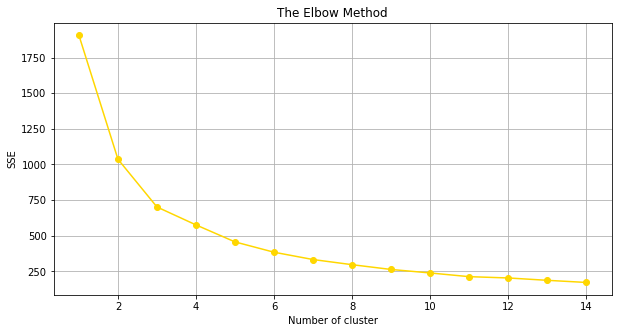

In [16]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_subset_pca)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()),marker='o',color='gold')
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

#### Silhouette Coefficient Method:

#### Visualizing the clustering

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

Source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

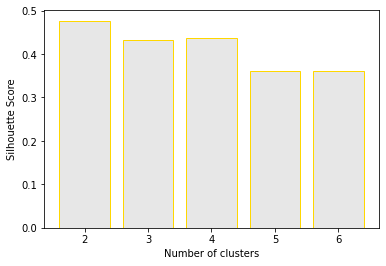

In [17]:
silhouette_scores = [] 

for n_cluster in range(2, 7):
    silhouette_scores.append( 
        silhouette_score(data_subset_pca, KMeans(n_clusters = n_cluster).fit_predict(data_subset_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 
plt.bar(k, silhouette_scores,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='gold') 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Based on the outcomes of Elbow Criterion Method and KMeans Silhouette Score the visualization with **3** clusters in K-means

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=20, random_state=0)
labels = kmeans.fit_predict(scaled_df) #wybranie 3 klastrów
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2,

#### Visualizing

In [19]:
data_subset_tf = pd.concat([data_subset_pca, 
                           pd.DataFrame(labels, columns=['labels'])], axis=1) #concat służy łączeniu najczęściej się używa join inner lub outer

data_subset_tf

,P1,P2,labels
0,0.448770,-0.215060,0
1,3.777381,-0.630305,1
2,2.550352,-1.352509,0
3,0.687686,-1.795979,0
4,2.001343,-0.089606,0
...,...,...,...
539,-1.156768,2.190497,2
540,0.268064,0.940014,2
541,-0.434649,-1.107865,0
542,4.292845,-2.852187,0


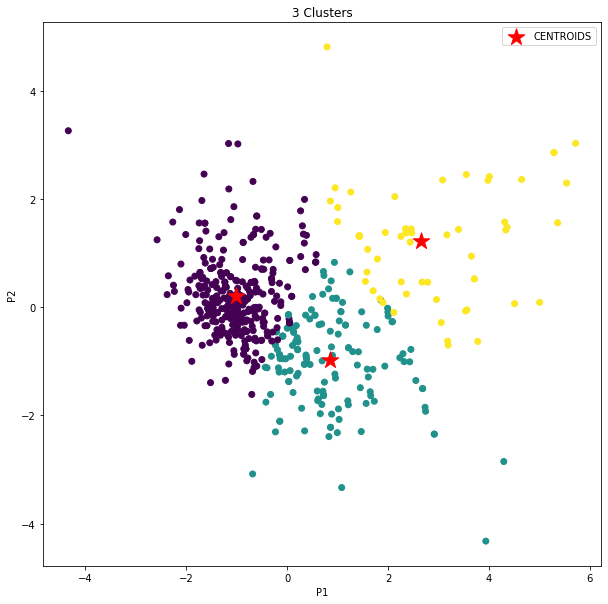

In [30]:
# Visualizing the clustering with 3 cluster
plt.figure(figsize=(10,10))
plt.scatter(data_subset_tf['P1'], data_subset_tf['P2'],  
           c = kmeans.fit_predict(data_subset_tf)) 

centroids = kmeans.cluster_centers_
ploted_centroids = plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='CENTROIDS')
plt.legend(handles=[ploted_centroids])

plt.title('3 Clusters')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show() 

Based on the outcomes of Elbow Criterion Method and KMeans Silhouette Score the visualization with **4** clusters in K-means

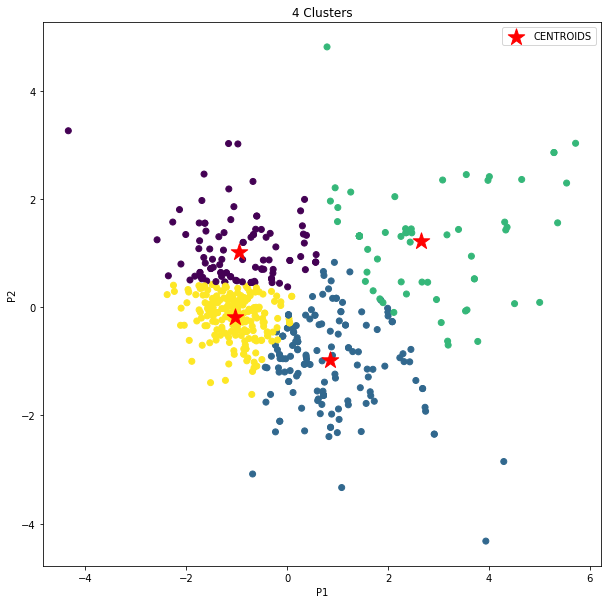

In [31]:
# Visualizing the clustering 4 clasters
plt.figure(figsize=(10,10))
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=20, random_state=0)
plt.scatter(data_subset_tf['P1'], data_subset_tf['P2'],  
           c = kmeans.fit_predict(data_subset_tf)) 

centroids = kmeans.cluster_centers_
ploted_centroids = plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='CENTROIDS')
plt.legend(handles=[ploted_centroids])

plt.title('4 Clusters')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show() 

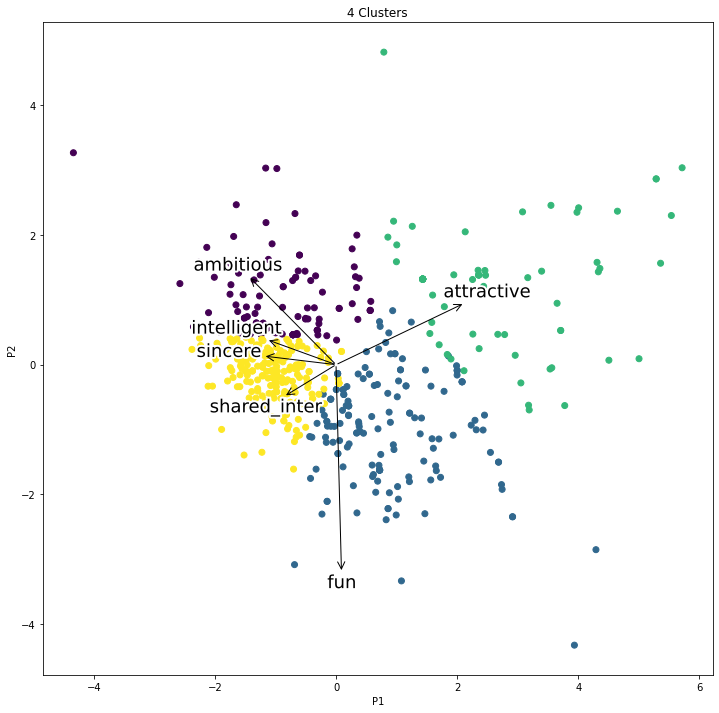

In [22]:
plt.figure(figsize=(12,12)) 
plt.scatter(data_subset_tf['P1'], data_subset_tf['P2'],  
           c = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=20, random_state=0).fit_predict(data_subset_tf)) 
plt.title('4 Clusters')
plt.xlabel('P1')
plt.ylabel('P2')
for i, colname in enumerate(data_subset.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=18,
             xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4), 
             arrowprops = {'arrowstyle':'<-'}, path_effects=[PathEffects.withStroke(linewidth=4,
                                                                                  foreground="w")])